# Library Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables

In [3]:
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

# First tests

In [4]:
#p3fold = os.environ['mount_point_path'] + "48c48/binned_cut12_hmz370_BMW/3PointCorrelation/"
#p2fold = os.environ['mount_point_path'] + "48c48/binned_cut12_hmz370_BMW/2PointCorrelation/"

p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"

In [5]:
#p = Path(p3fold)#.glob('**/*')
#T_list = sorted( [int(x.name[1:]) for x in p.iterdir() if x.is_dir() and x.name.startswith('T')] )
#bb_pathList = [f"{p3fold}T{T}" for T in T_list]
#
#T_list
#bb_pathList


In [6]:
#sorted( [str(f.absolute()) for f in folders] )

In [7]:
ok = moments_toolkit(p3fold,p2fold,maxConf=30,verbose=True)


Initializing the moments_toolkit class instance...



Reading data for T = 6 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 30/30 [01:28<00:00,  2.94s/it]



Looping over the configurations to read the 2-point correlators from the h5 files...



100%|██████████| 30/30 [00:05<00:00,  5.21it/s]




Reading data for T = 7 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 30/30 [01:24<00:00,  2.82s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 8 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 30/30 [01:26<00:00,  2.87s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 10 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 30/30 [01:33<00:00,  3.13s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 12 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 30/30 [01:51<00:00,  3.72s/it]



Two-point correlators retrieved from previous class instance...


Building the list of all available operators...


Class Initialization Complete!



In [8]:
bblist = ok.bb_list

[bb.nconf for bb in bblist]

[30, 30, 30, 30, 30]

In [9]:
ok.operator_show(show=True, verbose=True)


Generating the operators catalogue ...


Operators catalogue generated


Operators catalogue shown


Operators catalogue available in operator_catalogue.pdf



In [10]:
#ok.operator_show(remove_pdf=True, verbose=True)

In [11]:
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')

f = x**3 + x

f.simplify()

f.subs({x**3:y})

f

x**3 + x

x + y

x**3 + x

In [12]:
[i for i in range(2,10)]

[2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
type(f)

sympy.core.add.Add

In [14]:
op2 = ok.operator_list[1]

In [15]:
op2.id

2

In [16]:
len(ok.operator_list)

224

In [17]:
type(ok)

moments_toolkit.moments_toolkit

In [18]:
type(ok.operator_list)

type(ok.operator_list[1].id)

print(ok.operator_list[1].id)

list

int

2


In [19]:
ok.operator_list[1].O

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

In [20]:
np.shape(ok.operator_list)

(224,)

In [21]:
ok.selected_op = []
#ok.select_operator(2,11)
ok.select_operator(28,32)

In [22]:
ok.selected_op[1].K

(-E(p)**3 - 2*E(p)**2*m_N - E(p)*m_N**2 + E(p)*p_1**2 + E(p)*p_2**2 - 3*E(p)*p_3**2 - 2*m_N*p_3**2)/(2*E(p)*(E(p) + m_N))

In [23]:
type(ok.selected_op[1].O)
type(ok.selected_op[1].K)

sympy.core.add.Add

sympy.core.mul.Mul

In [24]:
[display(l.O) for l in ok.selected_op]

1.0*O[1, 3] + 1.0*O[3, 1]

1.0*O[3, 4] + 1.0*O[4, 3]

[None, None]

In [25]:
import sympy as sym
sym.pprint(ok.selected_op[1].O)

1.0⋅O[3, 4] + 1.0⋅O[4, 3]


In [26]:
ok.selected_op

[O[1, 3] + O[3, 1], O[3, 4] + O[4, 3]]

In [27]:
np.shape( np.zeros(shape=(0,5,5),dtype=complex) )

(0, 5, 5)

In [28]:
okR, _,_,_ = ok.get_R()

/wsgjsc/home/taggi1/workspace_folders/PhD_work/moments_pdf/test_notebooks/../moments_toolkit.py:543: ComplexWarning: Casting complex values to real discards the imaginary part
  covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(jack_mean,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(jack_mean,t2,axis=new_time_axis) ), axis=0 ),


In [29]:
okR[0,0,0,:ok.T_list[0]+1]

array([-0.12857833+0.02184363j, -0.05500077+0.06200085j,
       -0.02850342+0.06846329j, -0.01334324+0.08485101j,
        0.02092891+0.09253396j,  0.01905115-0.01277117j,
       -0.0408818 -0.05416485j])

In [30]:
np.shape(okR)[:-1]

(2, 30, 5)

In [31]:
np.shape(okR)

(np.take(okR,1,axis=3) == okR[:,:,:,1]).all()

(2, 30, 5, 13)

np.True_

In [32]:
np.shape(okR) + (1,)

(2, 30, 5, 13, 1)

In [33]:
newA = np.zeros(shape=(3,4,6,8))

#np.take(newA,3,axis=2) = np.ones(shape=(3,4,8))
tmp = np.take(newA,5,axis=2)
tmp = np.ones(shape=(3,4,8))

newA[:,:,5,:]

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [34]:
#np.shape( np.indices(dimensions=(3,4,6,8))

In [35]:
s = [slice(None)]*4
s



[slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None)]

In [36]:
s = [slice(None)]*4
axe1 = 2
idx = 4
s[axe1] = slice(idx,idx+1)
s

axe2 = 1
idx = 2
s[axe2] = slice(idx,idx+1)
s

newA[tuple(s)] = np.expand_dims( np.ones(shape=(3,8)) , [axe1,axe2])

[slice(None, None, None),
 slice(None, None, None),
 slice(4, 5, None),
 slice(None, None, None)]

[slice(None, None, None),
 slice(2, 3, None),
 slice(4, 5, None),
 slice(None, None, None)]

In [37]:
newA[:,:,4,:]

array([[[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]])

In [38]:
s = [slice(None)]*4
s

axe = 2
idx = 4

slice(idx,idx+1)

s[axe] = slice(idx,idx+1)

s


newA[tuple(s)] = np.expand_dims( np.ones(shape=(3,4,8)) , axe)

newA[:,:,4,:]

[slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None),
 slice(None, None, None)]

slice(4, 5, None)

[slice(None, None, None),
 slice(None, None, None),
 slice(4, 5, None),
 slice(None, None, None)]

array([[[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]])

In [39]:
import itertools as it

In [40]:
for i in it.combinations(range(3),2):
    i

(0, 1)

(0, 2)

(1, 2)

In [41]:
S1, Smean1, Sstd1 = ok.get_S(1)
Smean1
S2, Smean2, Sstd2 = ok.get_S(2)
Smean1
S3, Smean3, Sstd3 = ok.get_S(3)
Smean1
np.shape(Smean1)

array([[-0.0275422 +0.04910211j, -0.03452224+0.04924562j,
        -0.1149784 -0.01904843j, -0.21896071-0.04374321j,
        -0.65707351+0.13916855j],
       [-0.03995126-3.15736802j, -0.00295968-3.58634604j,
        -0.02216242-4.03646013j,  0.0099585 -4.80482374j,
         0.22995412-3.97935456j]])

array([[-0.0275422 +0.04910211j, -0.03452224+0.04924562j,
        -0.1149784 -0.01904843j, -0.21896071-0.04374321j,
        -0.65707351+0.13916855j],
       [-0.03995126-3.15736802j, -0.00295968-3.58634604j,
        -0.02216242-4.03646013j,  0.0099585 -4.80482374j,
         0.22995412-3.97935456j]])

array([[-0.0275422 +0.04910211j, -0.03452224+0.04924562j,
        -0.1149784 -0.01904843j, -0.21896071-0.04374321j,
        -0.65707351+0.13916855j],
       [-0.03995126-3.15736802j, -0.00295968-3.58634604j,
        -0.02216242-4.03646013j,  0.0099585 -4.80482374j,
         0.22995412-3.97935456j]])

(2, 5)

In [42]:
np.shape(S1)
np.shape(Smean1)
np.shape(Sstd1)

(2, 30, 5)

(2, 5)

(2, 5)

/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


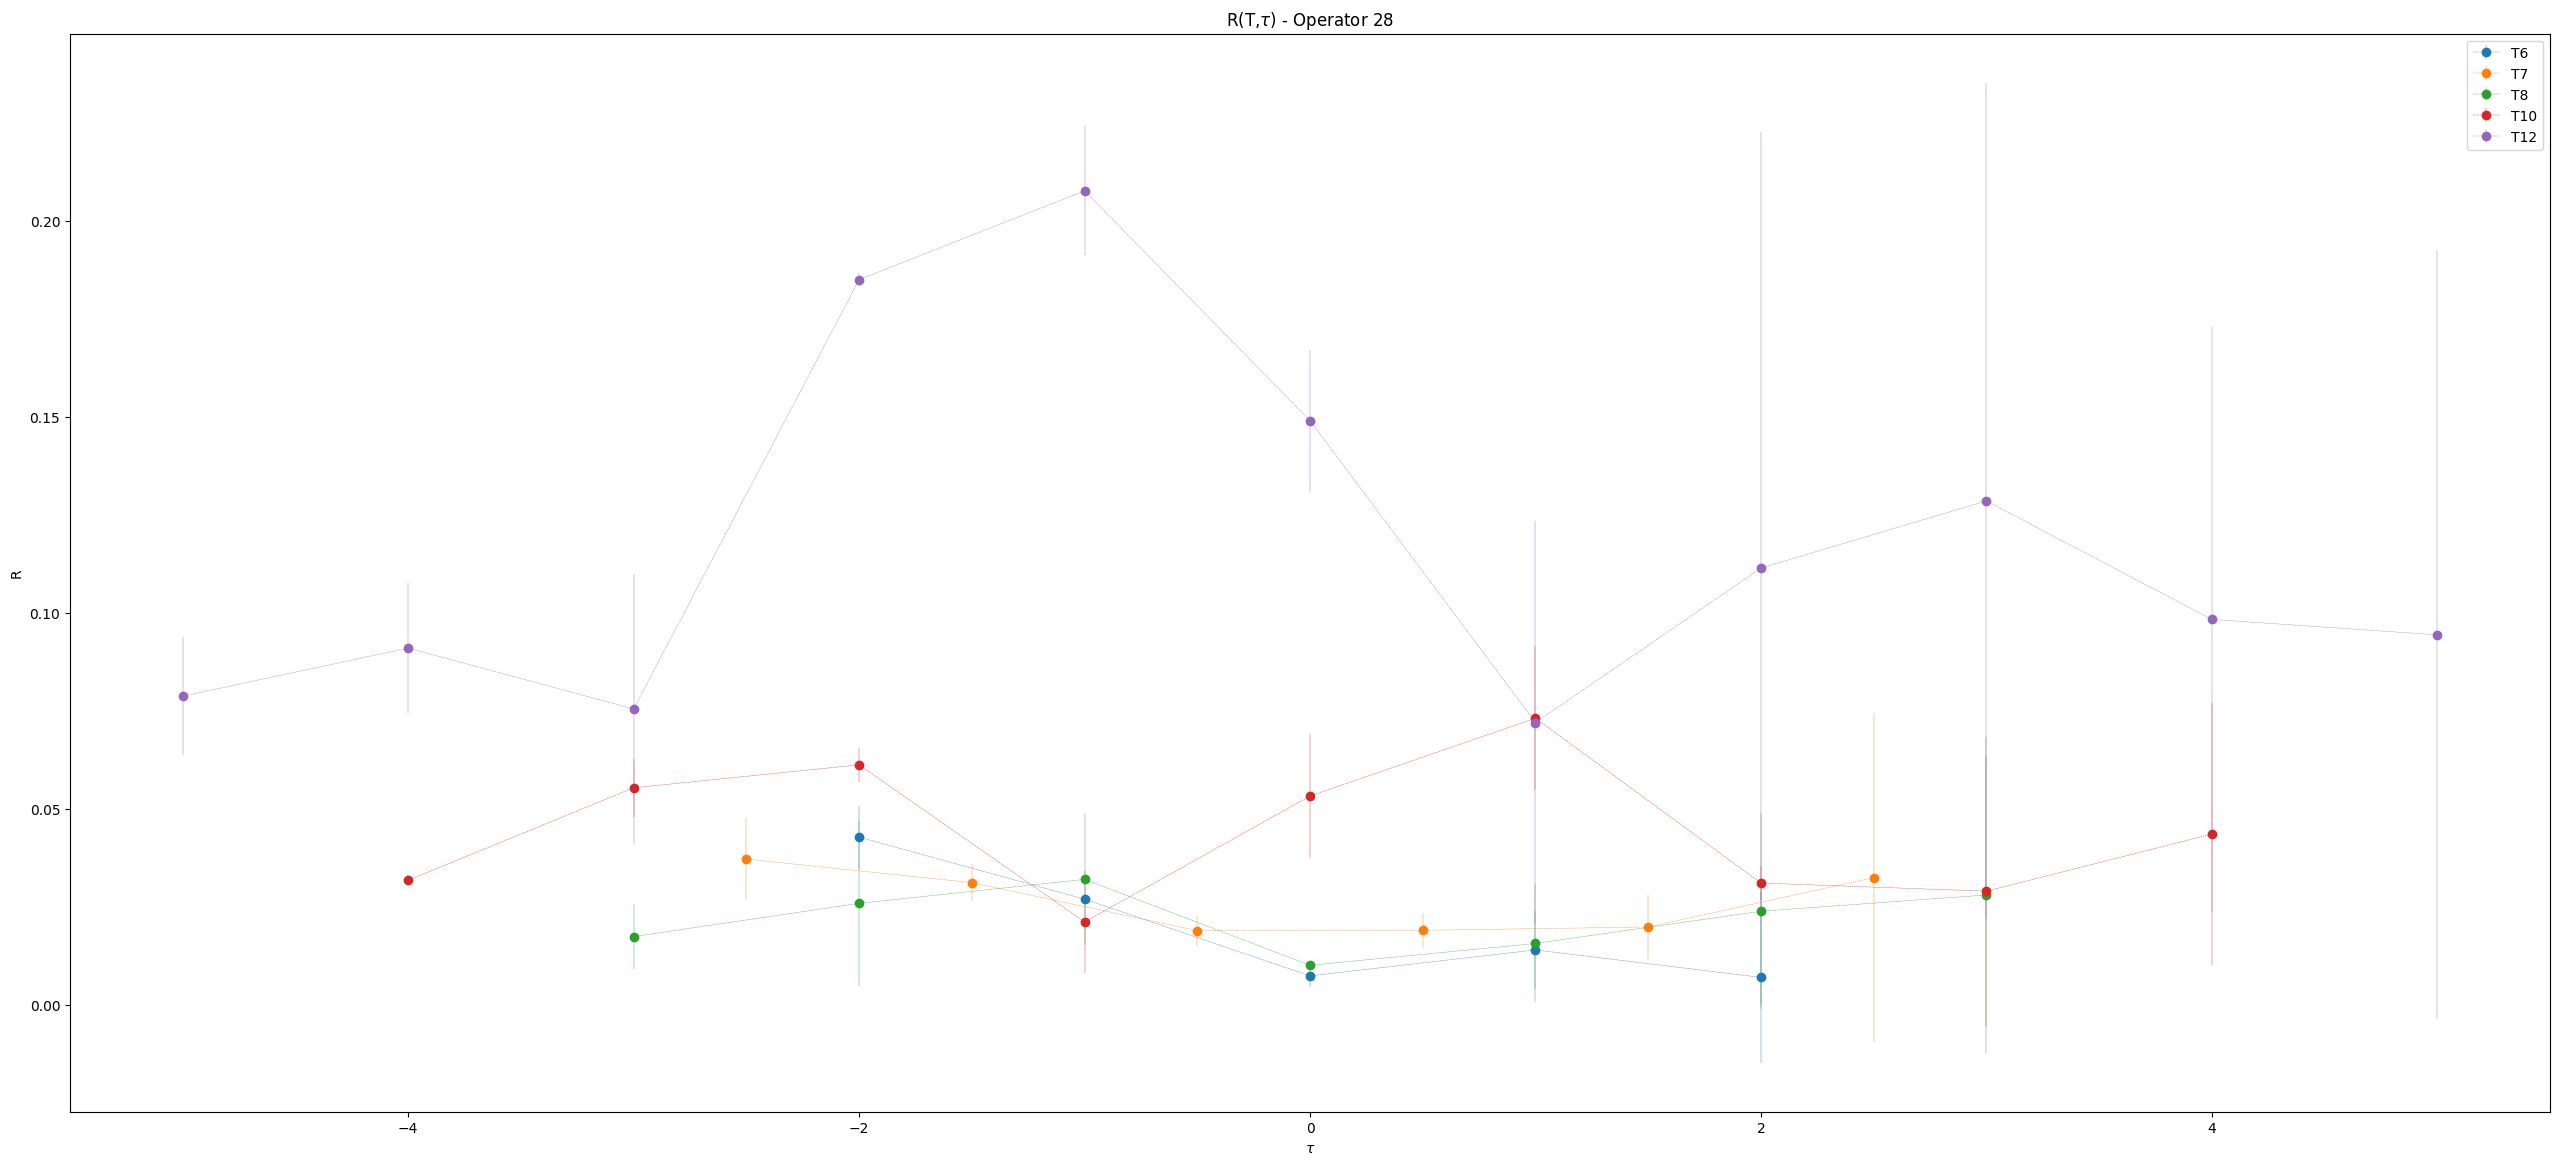

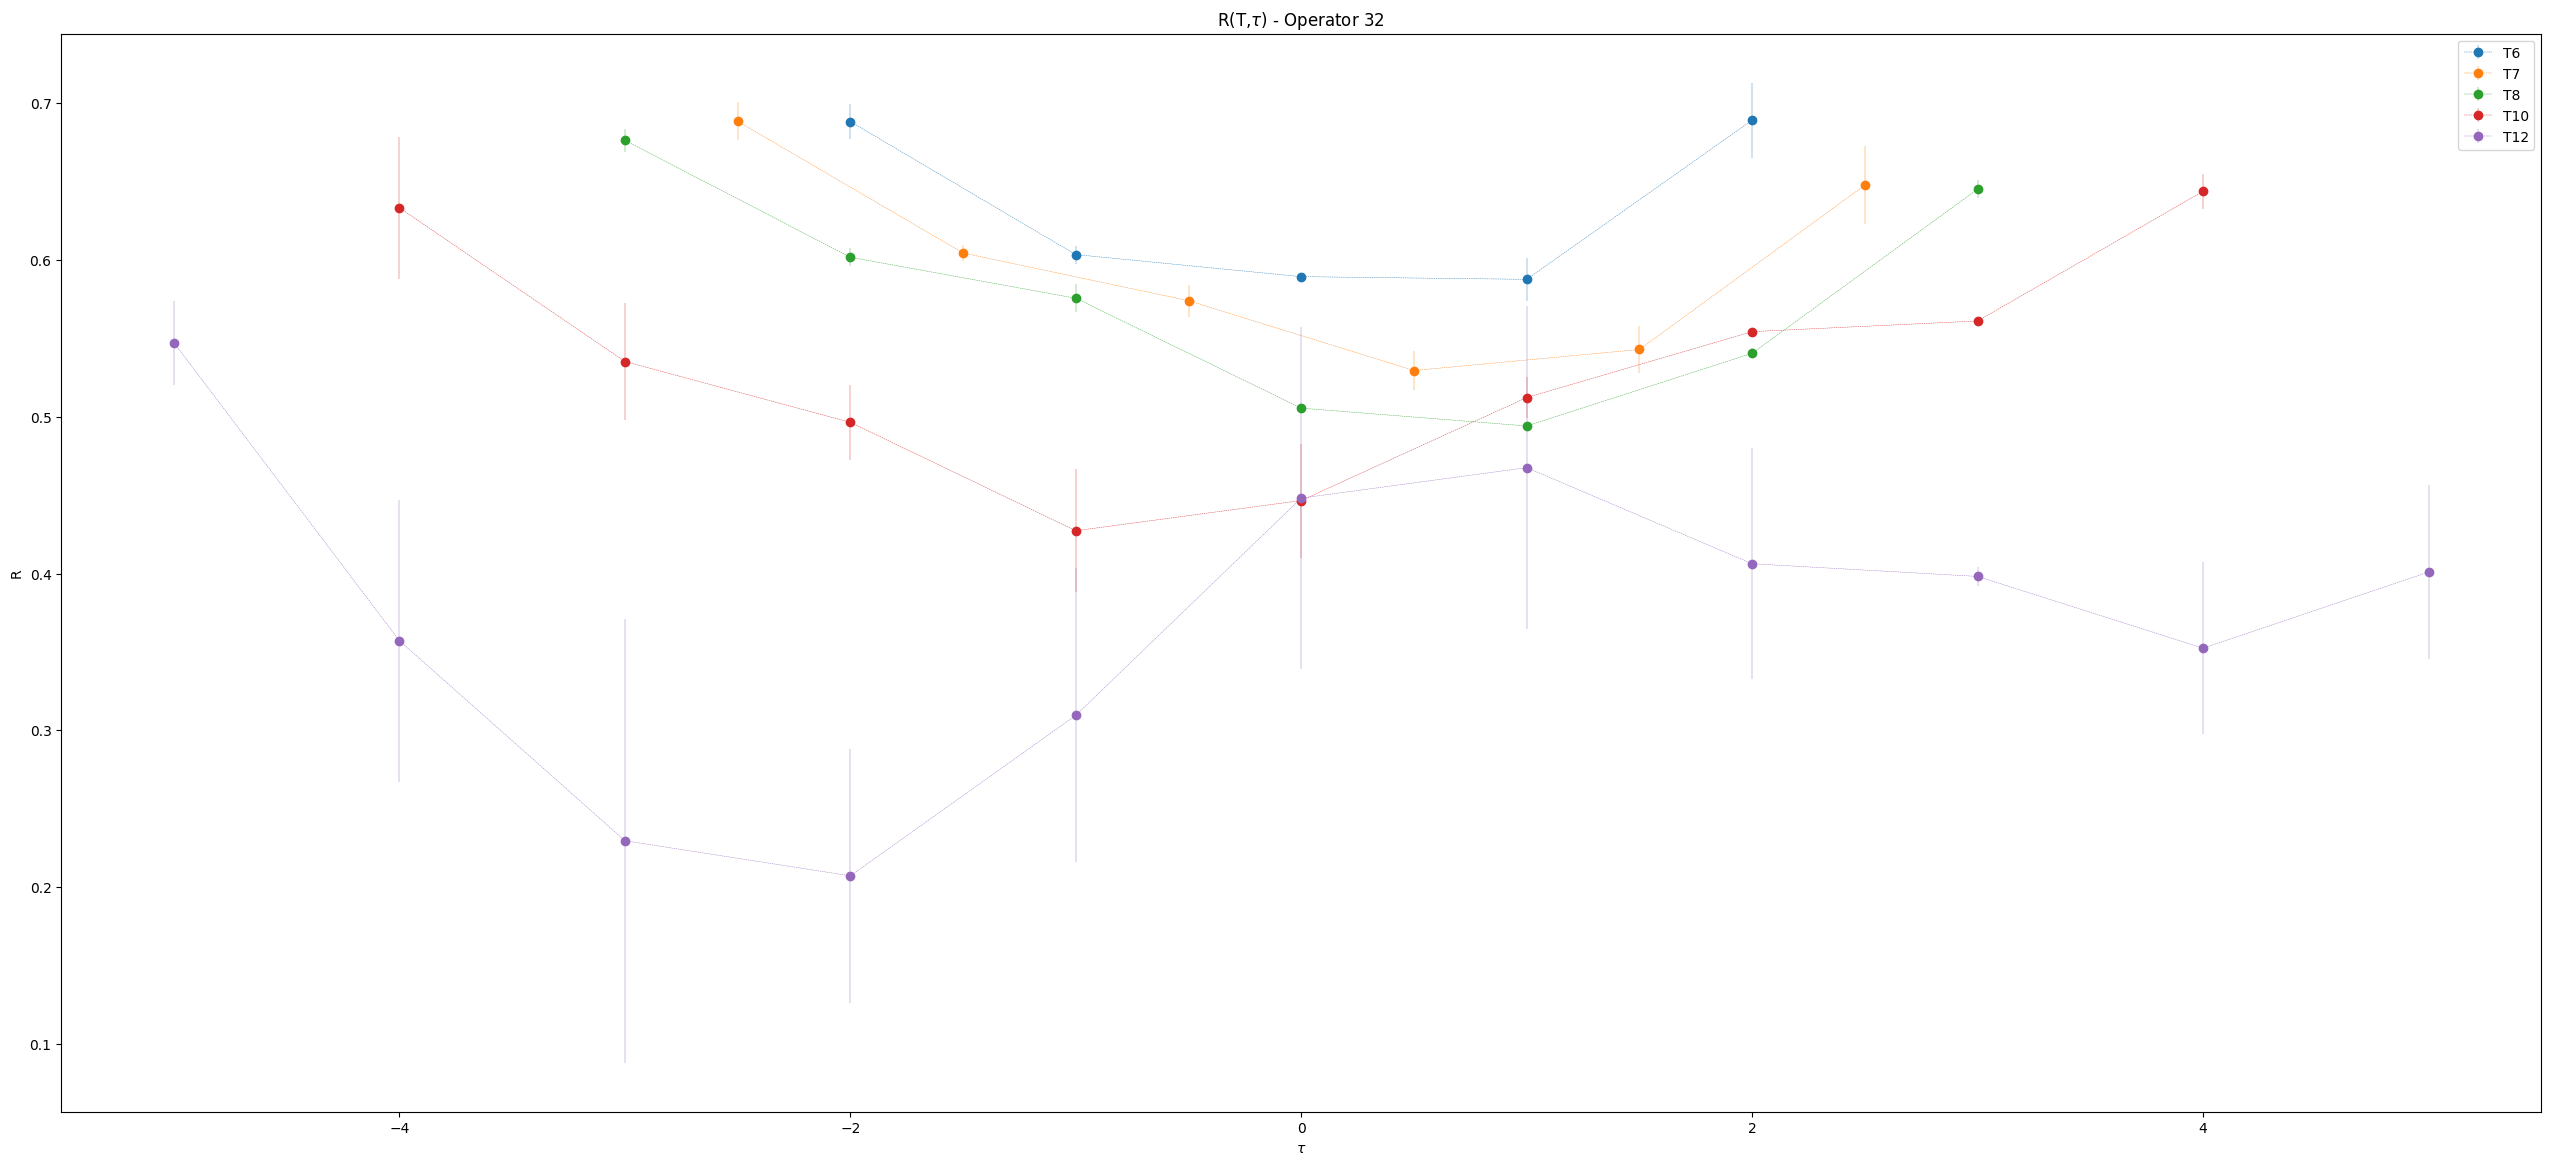

In [43]:
ok.plot_R()

In [44]:
from moments_toolkit import jackknife

In [45]:
def avg(in_array):
    return np.mean(in_array,axis=0)

p2corr = ok.bb_list[0].p2_corr

obs_mean, obs_std, covmat = jackknife(p2corr,avg,jack_axis=0,time_axis=-1)

In [46]:
np.shape(obs_mean)
np.shape(obs_std)
np.shape(covmat)

(48,)

(48,)

(48, 48)

In [47]:
def mymax(in_array):
    return np.max(in_array,axis=0)

In [48]:
obs_mean1, obs_std1, covmat1 = jackknife(p2corr,mymax,jack_axis=0,time_axis=-1)
np.shape(obs_mean1)
np.shape(obs_std1)
np.shape(covmat1)

(48,)

(48,)

(48, 48)

In [49]:
obs_mean2, obs_std2, covmat2 = jackknife(p2corr,lambda in_array : np.max(in_array, axis=0),jack_axis=0,time_axis=-1)
np.shape(obs_mean2)
np.shape(obs_std2)
np.shape(covmat2)

(48,)

(48,)

(48, 48)

In [50]:
(obs_mean1 == obs_mean2).all()

np.True_

In [51]:
len(np.shape(p2corr))
np.shape(p2corr)

2

(30, 48)

In [52]:
##function implementing the jackknife analysis
##def jackknife(in_array: np.ndarray, observable: Callable[[], Any], jack_axis=0, time_axis=-1, binsize=1,first_conf=0,last_conf=None) -> List[np.ndarray]:
#
#in_array = p2corr[:]
#
#observable = avg
#jack_axis = 0
#time_axis=-1
#
#binsize=1
#first_conf=0
#
#
##we set last conf to its default value
#last_conf = np.shape(in_array)[jack_axis]
#
##step 1: creation of the jackknife resamples
#jack_resamples = np.asarray( [np.delete(in_array, list(range(iconf,min(iconf+binsize,last_conf))) ,axis=jack_axis) for iconf in range(first_conf,last_conf,binsize)] ) #shape = (nresamp,) + shape(in_array) (with nconf -> nconf-binsize)
#print("jack resamples")
#print(np.shape(jack_resamples))
#
##the number of resamples is len(jack_resmaples[0]) or also
##nresamp = int((last_conf-first_conf)/binsize)
#nresamp = np.shape(jack_resamples)[0] #the 0th axis now is the resample axis, (and axis has nconf-1 conf in the standard case (binsize=1 ecc.) )
#
##step 2; for each resample we compute the observable of interest
##we use the resampled input array to compute the observable we want, and we have nresamp of them
#obs_resamp = np.asarray( [observable(jack_resamples[i]) for i in range(nresamp) ] )                                                                          #shape = (nresamp,) + shape(in_array) - jack_dimension
#print("obs resamples")
#print(np.shape(obs_resamp))
#
##step 3: we compute the observable also on the whole dataset
#obs = observable(in_array)                                                                                                                                   #shape = shape(in_array) - jack_dimension
#print("obs")
#print(np.shape(obs))
#
##step4: compute estimate, bias and std according to the jackknife method
#
##the estimate is the mean of the resamples
#jack_mean = np.mean(obs_resamp,axis=0) #axis 0 is the resamples one                                                                                         #shape = shape(in_array) - jack_dimension
#print("jack mean")
#print(np.shape(jack_mean))
#
##the jackknife bias is given by the following formula 
#bias = (nresamp-1) * (jack_mean - obs)                                                                                                                     #shape = shape(in_array) - jack_dimension
#print("bias")
#print(np.shape(bias))
#
##the jack std is given by the following formula
#obs_std = np.sqrt( (nresamp-1)/nresamp * np.sum( (obs_resamp - jack_mean)**2, axis=0 ) ) #the axis is the resamples one                                        #shape = shape(in_array) - jack_dimension
#print("obs std")
#print(np.shape(obs_std))
#
##to obtain the final estimate we correct the jack mean by the bias
#obs_mean = jack_mean - bias                                                                                                                                  #shape = shape(in_array) - jack_dimension
#
#
##step 5: covariance matrix computation
#
##to account for the fact that we have removed the jackknife dimension we change the time dimension
#
##first we compute the lenght in the time dimension
#lenT = np.shape(in_array)[time_axis]
#
##the time axis is translated to a positive value
#if time_axis<0:
#    #time_axis = lenT+time_axis
#    time_axis = len(np.shape(in_array))+time_axis
#
##then we check if the time dimension has to be reduced by one (i.e. if the just deleted jack axis causes the time axis to be smaller by 1)
#if jack_axis < time_axis :
#    new_time_axis = time_axis - 1
#
##we the instantiate the covariance matrix
#covmat = np.zeros(shape = np.shape(obs_mean) + (lenT,), dtype=float )
#
##we then loop over the times and fill the covariance matrix
#for t1 in range(lenT):
#    for t2 in range(lenT):
#
#        #we do a little of black magic to addres the right indices combinations (credit https://stackoverflow.com/questions/68437726/numpy-array-assignment-along-axis-and-index)
#        s = [slice(None)] * len(np.shape(covmat))
#        print(len(np.shape(covmat)))
#        axe1 = new_time_axis #position of the first time axis
#        print(f"axe1 {axe1}")
#        s[axe1] = slice(t1,t1+1)
#        axe2 =  len(np.shape(covmat))-1 #because the new time axis is at the end of the array
#        print(f"axe2 {axe2}")
#        s[axe2] = slice(t2,t2+1)
#
#        #we update the covariance matrix
#        covmat[tuple(s)] = np.expand_dims( (nresamp-1)/nresamp * np.sum( (  np.take(obs_resamp,t1,axis=time_axis) - np.take(obs,t1,axis=new_time_axis) ) * (  np.take(obs_resamp,t2,axis=time_axis) - np.take(obs,t2,axis=new_time_axis) ), axis=0 ),
#                                            [axe1,axe2])
#
#
#
#
##we return mean and std 
##return [obs_mean, obs_std, covmat]

In [53]:
#np.shape(covmat)

In [54]:
#np.take(obs,t1,axis=time_axis)

/wsgjsc/home/taggi1/workspace_folders/PhD_work/.venv/lib64/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<ErrorbarContainer object of 3 artists>

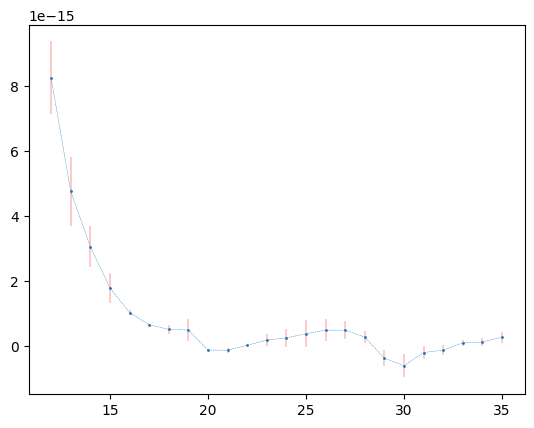

In [55]:
obs_mean, obs_std, covmat = jackknife(p2corr,lambda in_array : np.mean(in_array, axis=0),jack_axis=0,time_axis=-1)

cut = 12

times = np.arange(np.shape(obs_mean)[0])

plt.errorbar(times[cut:-cut], obs_mean[cut:-cut], yerr = obs_std[cut:-cut], marker = 'o', markersize = 1.0, linewidth = 0.3, linestyle='dashed', ecolor='red')

In [56]:
obs_mean, obs_std, covmat = jackknife(p2corr.real,lambda in_array : np.mean(in_array, axis=0),jack_axis=0,time_axis=-1)

(np.sqrt(np.diag(covmat)) == np.abs(obs_std) ).all()

np.False_

In [57]:
np.shape(covmat)

(48, 48)

In [58]:
np.array(0)

array(0)

In [59]:
np.diag([[1,2,4],
         [5,6,8]])

array([1, 6])

In [60]:
np.shape( np.diag(obs_std) )

(48, 48)

In [61]:
len( np.diag(np.diag(obs_std) ) )

48

In [ ]:
S1, Smean1, Sstd1 = ok.get_S(1)

Smean1
Sstd1
np.shape(Smean1)
np.shape(Sstd1)

array([[-0.0275422 +0.04910211j, -0.03452224+0.04924562j,
        -0.1149784 -0.01904843j, -0.21896071-0.04374321j,
        -0.65707351+0.13916855j],
       [-0.03995126-3.15736802j, -0.00295968-3.58634604j,
        -0.02216242-4.03646013j,  0.0099585 -4.80482374j,
         0.22995412-3.97935456j]])

array([[0.0318448 -0.01438471j, 0.06964615-0.04488878j,
        0.1341303 -0.09273748j, 0.10572199-0.13670266j,
        0.12882407-0.16378785j],
       [0.00797893-0.0264474j , 0.0902858 +0.11664044j,
        0.03786848+0.16274631j, 0.0917905 +0.13819356j,
        0.68487732-0.40889482j]])